<a href="https://colab.research.google.com/github/RajeshworM/Machine_Learning/blob/main/Machine_Use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from google.colab import files

In [2]:
# Upload file manually in Google Colab
display("Please upload the state_level_machine_usage.csv file")
uploaded = files.upload()

'Please upload the state_level_machine_usage.csv file'

Saving state_level_machine_usage.csv to state_level_machine_usage.csv


In [3]:
# Load State-Level Data
data = pd.read_csv("state_level_machine_usage.csv")

In [4]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
              Year  Hand_Operated  Animal_Operated  Power_Operated
count   480.000000     480.000000       480.000000      480.000000
mean   2011.000000       1.488250         0.930438        0.851917
std       4.086742       1.931168         2.924247        1.554461
min    2006.000000       0.000000         0.000000        0.000000
25%    2006.000000       0.330000         0.097500        0.097500
50%    2011.000000       0.780000         0.400000        0.360000
75%    2016.000000       1.775000         0.992500        0.942500
max    2016.000000      12.990000        59.000000       20.380000


In [5]:
# Variance Analysis
state_variance = data.groupby("State")[["Hand_Operated", "Animal_Operated", "Power_Operated"]].var()
print("\nVariance by State:")
print(state_variance)


Variance by State:
                   Hand_Operated  Animal_Operated  Power_Operated
State                                                            
A & N Islands           2.754135         0.242092        0.312124
Andhra Pradesh          2.641241         1.534535        4.432110
Arunachal Pradesh       1.523367         0.217874        0.050057
Assam                   4.902035         4.181031        0.285478
Chandigarh              4.189541         0.010864        4.674864
Chhattisgarh            1.089769         1.804470        0.127212
D & N Haveli            0.728964         0.893578        0.006538
Daman & Diu             6.267503         2.012878       27.501321
Delhi                   0.891870         0.027907        1.769378
Goa                     1.272778         0.520740        1.040350
Gujarat                 0.743827         0.406384        1.709781
Haryana                 0.827635         0.101581        4.079135
Himachal Pradesh        5.043774         1.632031       

In [6]:
size_class_variance = data.groupby("Size_Class")[["Hand_Operated", "Animal_Operated", "Power_Operated"]].var()
print("\nVariance by Size Class:")
print(size_class_variance)


Variance by Size Class:
             Hand_Operated  Animal_Operated  Power_Operated
Size_Class                                                 
Large             0.887618        37.899701        0.021815
Marginal          6.065474         2.571858        8.024767
Medium            0.086888         0.049209        0.081589
Semi-Medium       0.304768         0.156458        0.251276
Small             0.650436         0.463282        0.749971


In [7]:
yearly_variance = data.groupby("Year")[["Hand_Operated", "Animal_Operated", "Power_Operated"]].var()
print("\nVariance by Year:")
print(yearly_variance)



Variance by Year:
      Hand_Operated  Animal_Operated  Power_Operated
Year                                                
2006       3.467741         1.528538        0.351868
2011       3.223868         1.072810        1.061876
2016       4.451536        23.049504        5.382563


In [8]:
# Levene's Test for Homogeneity of Variance
levene_hand = stats.levene(data['Hand_Operated'], data['Animal_Operated'], data['Power_Operated'])
print("\nLevene's Test for Variance Homogeneity:", levene_hand)


Levene's Test for Variance Homogeneity: LeveneResult(statistic=np.float64(5.602211126606487), pvalue=np.float64(0.0037707418670576602))


In [9]:
# ANOVA: Testing Machine Usage Across States
model = ols('Hand_Operated ~ C(State)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA for Hand-Operated Machines Across States:")
print(anova_table)


ANOVA for Hand-Operated Machines Across States:
               sum_sq     df         F   PR(>F)
C(State)   213.675797   31.0  1.963463  0.00182
Residual  1572.711133  448.0       NaN      NaN


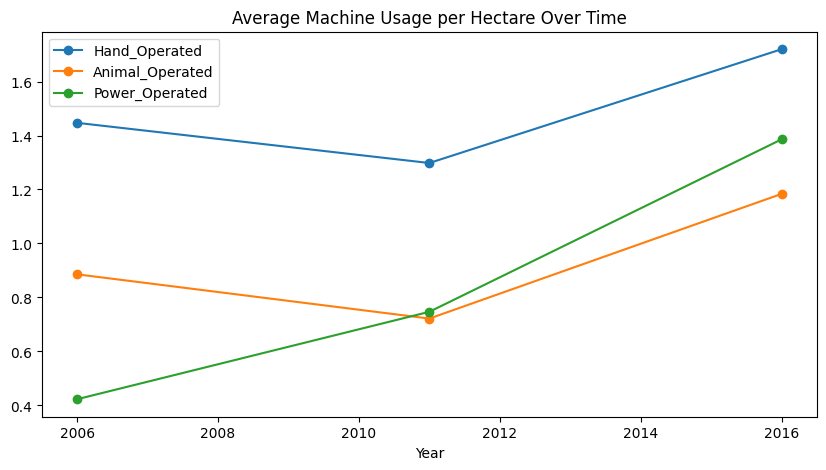

In [10]:
# Time-Series Variance Analysis
data_grouped = data.groupby("Year")[["Hand_Operated", "Animal_Operated", "Power_Operated"]].mean()
data_grouped.plot(marker='o', figsize=(10, 5), title="Average Machine Usage per Hectare Over Time")
plt.show()


Correlation Matrix:
                 Hand_Operated  Animal_Operated  Power_Operated
Hand_Operated         1.000000         0.308735        0.464675
Animal_Operated       0.308735         1.000000        0.089776
Power_Operated        0.464675         0.089776        1.000000


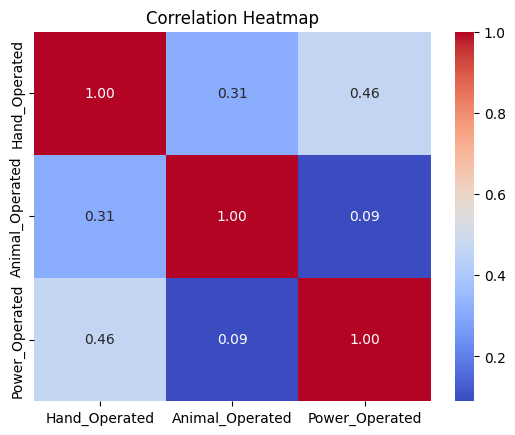

In [11]:
# Correlation Analysis
corr_matrix = data[["Hand_Operated", "Animal_Operated", "Power_Operated"]].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

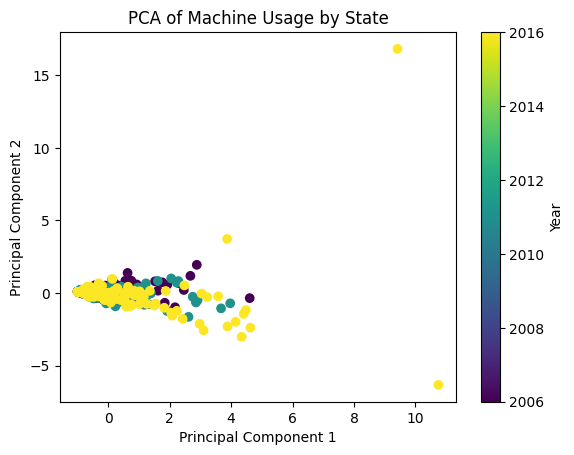

In [12]:
# Principal Component Analysis (PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["Hand_Operated", "Animal_Operated", "Power_Operated"]])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data["Year"], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Machine Usage by State")
plt.colorbar(label="Year")
plt.show()

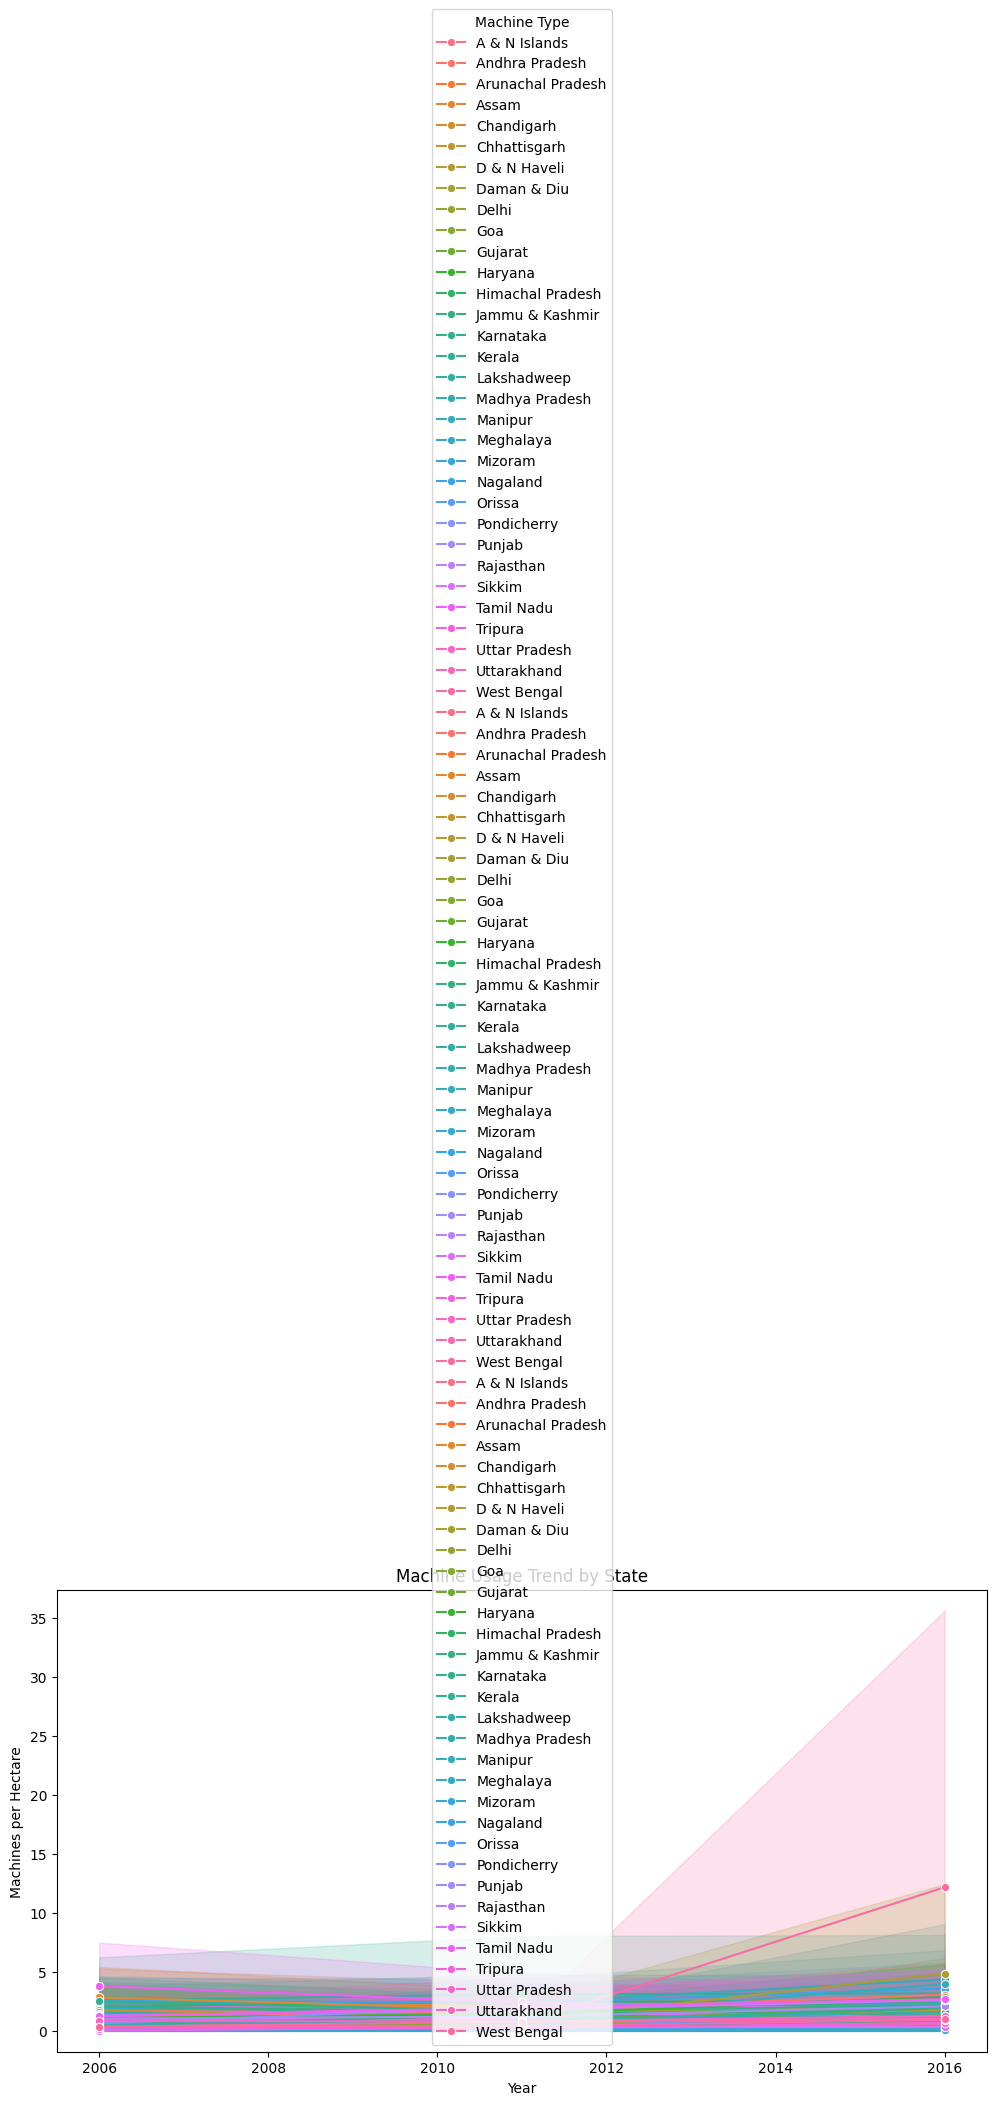

In [13]:
# Trend Analysis for Each Machine Type
plt.figure(figsize=(12, 6))
for column in ["Hand_Operated", "Animal_Operated", "Power_Operated"]:
    sns.lineplot(x=data["Year"], y=data[column], hue=data["State"], marker='o')
plt.title("Machine Usage Trend by State")
plt.xlabel("Year")
plt.ylabel("Machines per Hectare")
plt.legend(title="Machine Type")
plt.show()

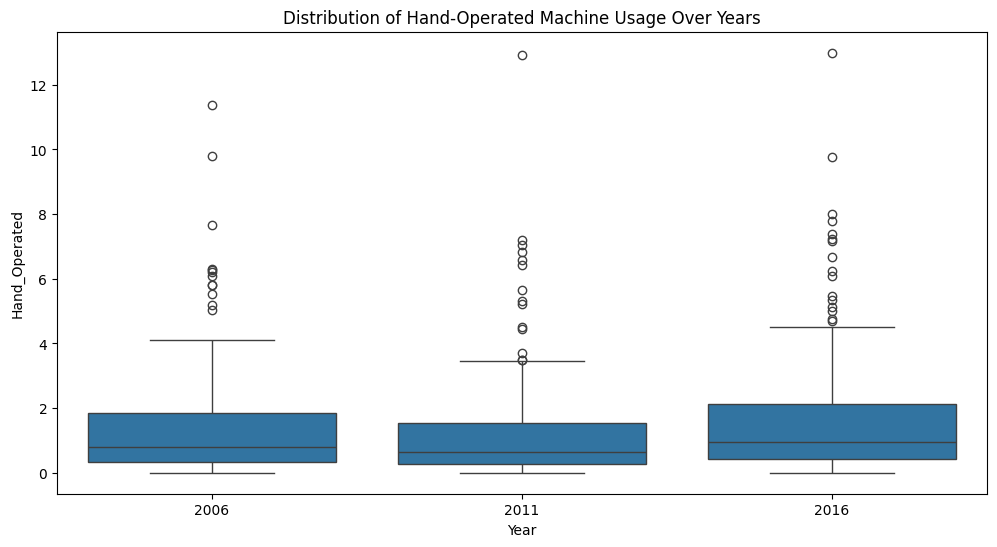

In [14]:
# Boxplot to Show Distribution of Machine Usage
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="Hand_Operated", data=data)
plt.title("Distribution of Hand-Operated Machine Usage Over Years")
plt.show()

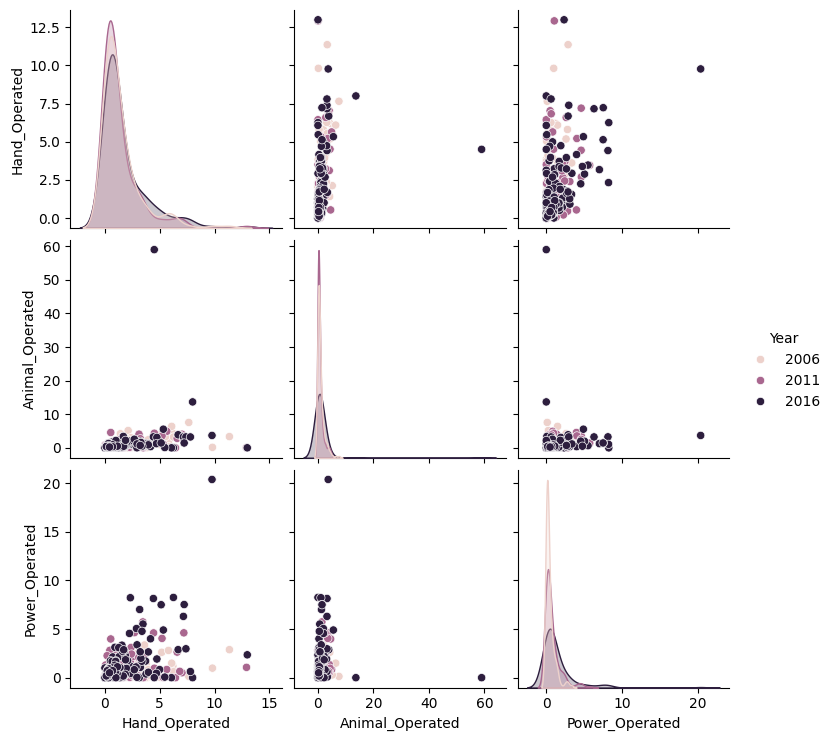

In [15]:
# Pairplot for Relationship Between Variables
sns.pairplot(data[["Hand_Operated", "Animal_Operated", "Power_Operated", "Year"]], hue="Year")
plt.show()


In [16]:
# Outlier Detection Using Z-Score
z_scores = np.abs(stats.zscore(data[["Hand_Operated", "Animal_Operated", "Power_Operated"]]))
outliers = (z_scores > 3).sum(axis=1)
data["Outlier_Count"] = outliers
print("\nOutliers Detected in Data:")
print(data[data["Outlier_Count"] > 0])


Outliers Detected in Data:
               State Size_Class  Year  Hand_Operated  Animal_Operated  \
15             Assam   Marginal  2006           7.65             7.56   
75            Kerala   Marginal  2006           9.81             0.15   
135       Tamil Nadu   Marginal  2006          11.36             3.35   
235           Kerala   Marginal  2011          12.92             0.05   
275      Pondicherry   Marginal  2011           3.46             1.40   
325   Andhra Pradesh   Marginal  2016           4.42             3.27   
340       Chandigarh   Marginal  2016           6.25             0.00   
355      Daman & Diu   Marginal  2016           9.77             3.69   
375          Haryana   Marginal  2016           2.32             1.05   
385  Jammu & Kashmir   Marginal  2016           7.16             3.25   
395           Kerala   Marginal  2016          12.99             0.01   
410          Manipur   Marginal  2016           7.39             3.25   
414          Manipur   

In [17]:
# Kruskal-Wallis Test for Non-Parametric Variance Analysis
kruskal_test = stats.kruskal(data['Hand_Operated'], data['Animal_Operated'], data['Power_Operated'])
print("\nKruskal-Wallis Test Results:", kruskal_test)


Kruskal-Wallis Test Results: KruskalResult(statistic=np.float64(81.67908109359617), pvalue=np.float64(1.8349020972661532e-18))


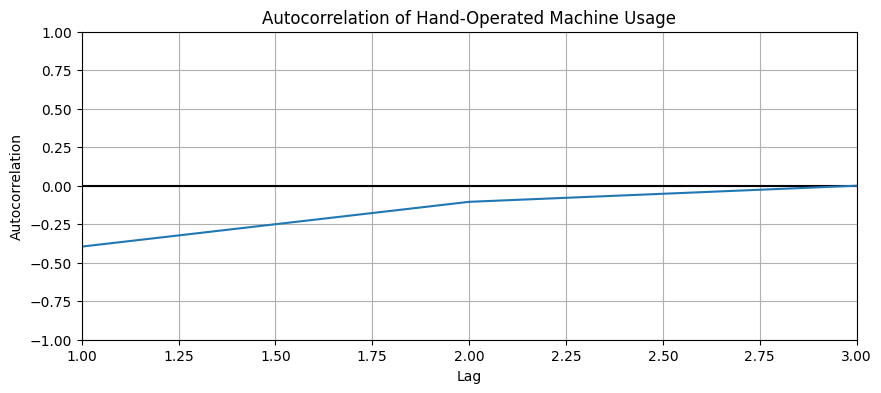

In [18]:
# Autocorrelation Analysis (For Time Series Dependence)
plt.figure(figsize=(10, 4))
pd.plotting.autocorrelation_plot(data_grouped["Hand_Operated"])
plt.title("Autocorrelation of Hand-Operated Machine Usage")
plt.show()


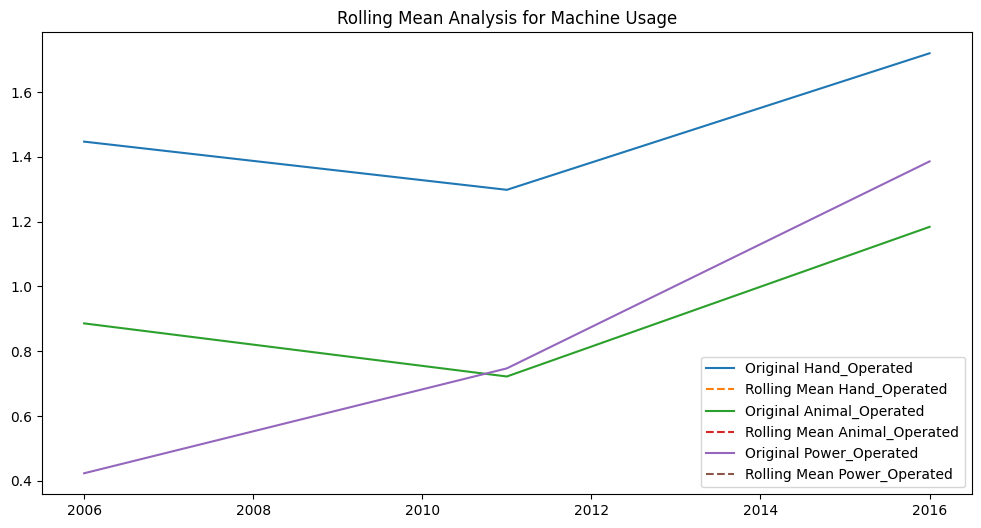

In [19]:
# Rolling Mean & Standard Deviation for Trend Analysis
rolling_window = 3
data_grouped_rolling = data_grouped.rolling(rolling_window).mean()
plt.figure(figsize=(12, 6))
for column in data_grouped.columns:
    plt.plot(data_grouped.index, data_grouped[column], label=f"Original {column}")
    plt.plot(data_grouped_rolling.index, data_grouped_rolling[column], linestyle='dashed', label=f"Rolling Mean {column}")
plt.legend()
plt.title("Rolling Mean Analysis for Machine Usage")
plt.show()


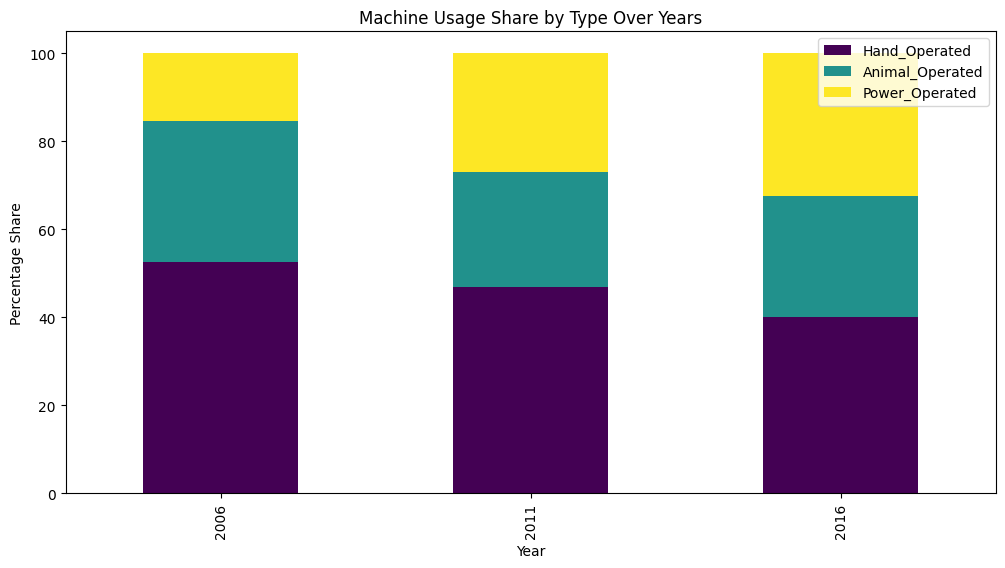

In [20]:
# Machine Usage Share by Type per Year
usage_share = data.groupby("Year")[["Hand_Operated", "Animal_Operated", "Power_Operated"]].sum()
usage_share_percentage = usage_share.div(usage_share.sum(axis=1), axis=0) * 100
usage_share_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Machine Usage Share by Type Over Years")
plt.ylabel("Percentage Share")
plt.show()